In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
# Loading your IBM Q account(s)
from qiskit import IBMQ
IBMQ.enable_account('c7f72c2b494928b1464337089cc66f8dfd3b8114b180eb6b29004886b04fd70e1d45c4d7c1af99b4d8ed0332933d1a742dbe500d29d34ae47706d51b6dadfbad')

In [2]:
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q, c);

In [4]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(IBMQ.backends(filters=lambda x: not x.configuration().simulator))
backend.name()

'ibmqx2'

In [5]:
job1 = execute(qc, backend)
job_monitor(job1)

Job Status: job has successfully run


In [19]:
job2 = execute(qc, backend, shots=8000)
job_monitor(job2, interval=5)

Job Status: job has successfully run


In [7]:
backend_monitor(backend)

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 1
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    max_experiments: 75
    coupling_map: [[0, 1], [0, 2], [1, 2], [3, 2], [3, 4], [4, 2]]
    backend_version: 1.0.0
    max_shots: 8192
    url: None
    description: 5 qubit device
    online_date: 2018-11-06T05:00:00+00:00
    sample_name: sparrow
    backend_name: ibmqx2
    memory: True
    n_registers: 1
    conditional: False
    open_pulse: False
    allow_q_object: True
    credits_required: True

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.28638 GHz / 29.34082 µs / 22.51479 µs / 0.0 / 0.00696 / 0.01392 / 0.12075
    Q1 / 5.23817 GHz / 47.03306 µs / 31.67 µs / 0.0 / 0.00189 / 0.00378 / 0.31825
    Q2 / 5.02998 GHz / 74.94856 µs / 61.10062 µs / 0.0 / 0.00636 / 0.01272 /

In [8]:
backend_overview()

ibmq_16_melbourne           ibmqx2                       ibmqx4
-----------------           ------                       ------
Num. Qubits:  14            Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0             Pending Jobs: 1              Pending Jobs: 2
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operational:  True           Operational:  True
Avg. T1:      61.4          Avg. T1:      53.8           Avg. T1:      45.9
Avg. T2:      78.1          Avg. T2:      34.2           Avg. T2:      25.3





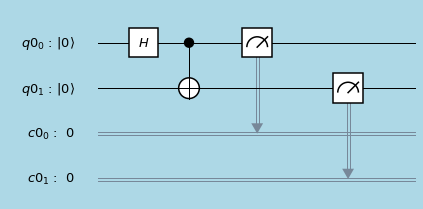

In [15]:
style = {'backgroundcolor': 'lightblue'}
qc.draw(output='mpl', style=style)

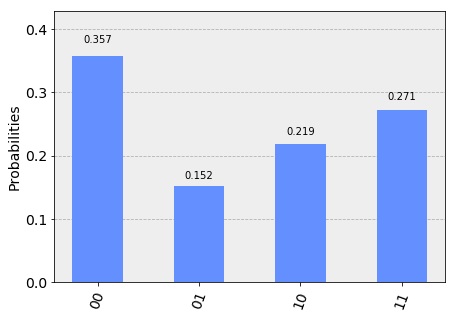

In [20]:
from qiskit.visualization import plot_histogram
counts = job1.result().get_counts()
plot_histogram(counts)


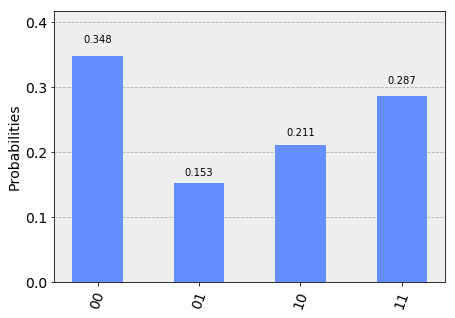

In [21]:
counts = job2.result().get_counts()
plot_histogram(counts)